## Q Learning
Suppose we have 5 rooms in a building connected by doors as shown in the figure below. We'll
number each room 0 through 4. The outside of the building can be thought of as one big room
(5). Notice that doors 1 and 4 lead into the building from room 5 (outside).
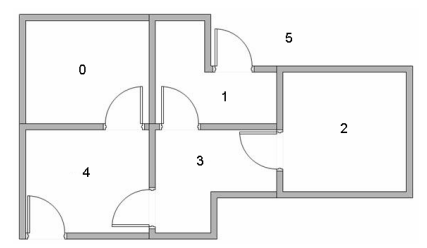
<br>
<br>
For this example, we'd like to put an agent in any room, and from that room, go outside the
building (this will be our target room). In other words, the goal room is number 5. To set this
room as a goal, we'll associate a reward value to each door (i.e. link between nodes). The doors
that lead immediately to the goal have an instant reward of 100. Other doors not directly
connected to the target room have zero reward. Because doors are two-way ( 0 leads to 4, and
4 leads back to 0 ), two arrows are assigned to each room.
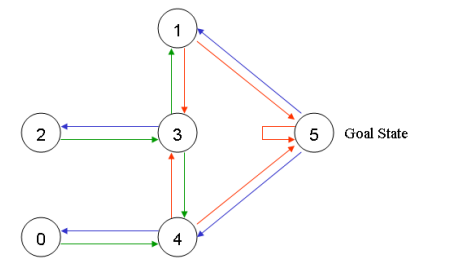

<br>
<br>

### Q Learning

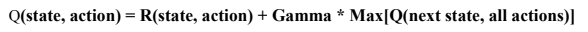

In [ ]:
import random

In [ ]:
def trace_path_to_goal(Q,starting_state,goal_state):
  path = [starting_state]
  while starting_state!=goal_state:
    starting_state = [idx for idx in range(len(Q)) if (Q[starting_state][idx]==max(Q[starting_state]) and idx!=starting_state)][0]
    path.append(starting_state)

  for i in path[:len(path)-1]:
    print(i,end="->")
  print(path[-1])

  return path

In [ ]:
# reward matrix -> immedately reachable to goal-100, immediately reachable to other-0, no edge between two states- -1
#6x6 matrix
R = [[-1,-1,-1,-1,0,-1,], #state - 0
     [-1,-1,-1,0,-1,100], #state - 1
     [-1,-1,-1,0,-1,-1],  #state - 2
     [-1,0,0,-1,0,-1],    #state - 3
     [0,-1,-1,0,-1,100],  #state - 4
     [-1,0,-1,-1,0,100]   #state - 5
     ]

#Q Matrix (Memory Matrix) - Initally all are assigned to 0 - Null matrix
#Q Matrix is learnt to make decisions based on trail and error
#6x6 Matrix
Q = [[0]*6 for i in range(6)]

#One episode means starting from one random state to reaching the goal state(5)
#Higher the episodes better the learnings. similar to epochs
NUM_OF_EPISODES = 100

#value closer to 1 indicates importance on future rewards
#closer to zero indicates importance on immediate rewards
GAMMA = 0.8

In [ ]:
#Q - learning algorithm
for EPISODE  in  range(NUM_OF_EPISODES):
  current_state = random.choice([i for i in range(6)])
  next_state = -1
  #one episode finishes only if we reach goal state
  while next_state != 5:

    #find possible states for current state
    possible_states = []
    for idx in range(len(R[current_state])):
      if R[current_state][idx]>=0:
        possible_states.append(idx)

    #choosing the next state randomly from all the possible states
    next_state = random.choice(possible_states)

    #finding the state with highest rewards for next state
    future_state_rewards = max(Q[next_state])
    future_state = -1
    for idx in range(len(Q[next_state])):
      if Q[next_state][idx]==future_state_rewards:
        future_state = idx
        break

    #Updating Q matrix of current_state to action of next state
    Q[current_state][next_state] = R[current_state][next_state] + GAMMA * future_state_rewards
    #next state becomes the current state
    current_state = next_state

  print("EPISODE:",EPISODE+1,"Completed.")
  print(Q)
  print("-"*20)

EPISODE: 1 Completed.
[[0, 0, 0, 0, 0.0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 100.0], [0, 0, 0, 0, 0, 0]]
--------------------
EPISODE: 2 Completed.
[[0, 0, 0, 0, 0.0, 0], [0, 0, 0, 0, 0, 100.0], [0, 0, 0, 0, 0, 0], [0, 0.0, 0, 0, 80.0, 0], [0, 0, 0, 64.0, 0, 100.0], [0, 0, 0, 0, 0, 0]]
--------------------
EPISODE: 3 Completed.
[[0, 0, 0, 0, 0.0, 0], [0, 0, 0, 0, 0, 100.0], [0, 0, 0, 0, 0, 0], [0, 0.0, 0, 0, 80.0, 0], [0, 0, 0, 64.0, 0, 100.0], [0, 0, 0, 0, 0, 0]]
--------------------
EPISODE: 4 Completed.
[[0, 0, 0, 0, 0.0, 0], [0, 0, 0, 0, 0, 100.0], [0, 0, 0, 0, 0, 0], [0, 0.0, 0, 0, 80.0, 0], [0, 0, 0, 64.0, 0, 100.0], [0, 0, 0, 0, 0, 0]]
--------------------
EPISODE: 5 Completed.
[[0, 0, 0, 0, 0.0, 0], [0, 0, 0, 0, 0, 100.0], [0, 0, 0, 0, 0, 0], [0, 0.0, 0, 0, 80.0, 0], [0, 0, 0, 64.0, 0, 100.0], [0, 0, 0, 0, 0, 100.0]]
--------------------
EPISODE: 6 Completed.
[[0, 0, 0, 0, 0.0, 0], [0, 0, 0, 0, 0, 180.0], [0, 0, 0, 0, 0, 0], [0, 0.0, 

In [ ]:
path_from_2_to_goal = trace_path_to_goal(Q,2,5)

2->3->1->5
